# Amazon Product Sales Dataset — Exploratory Data Analysis (EDA) and Visualization 
📂 **Dataset source:** [Amazon Products Sales Dataset (42K+ Items – 2025)](https://www.kaggle.com/datasets/ikramshah512/amazon-products-sales-dataset-42k-items-2025)

This notebook explores product performance data from an e-commerce platform (Amazon-like dataset).  
The main goal is to analyze sales patterns, pricing behavior, discount effects, and product popularity through detailed data cleaning and visualization steps.   

Key steps include:
- Data selection and preprocessing
- Missing value imputation
- Univariate and bivariate analyses
- Group-based summaries and correlation insights  

The analysis aims to uncover how factors like price, rating, and discounts influence product sales and to prepare the dataset for future modeling or prediction tasks.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plt.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (8, 6)

In [3]:
df =  pd.read_csv("../data/amazon_sales_2025_cleaned.csv")
df.head()

,product_title,product_rating,review_count,sales_last_month,discounted_price,variant_price,original_price,best_seller,sponsored,coupon_available,...,product_image_url,product_url,collected_date,discount_rate,price_segment,has_discount,collection_day,collection_month,collection_week,product_category
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,NaN,159.00,No Badge,Sponsored,15,...,https://m.media-amazon.com/images/I/71pAqiVEs3...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29,43.597484,Medium,1,21,8,34,Smartphones
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,NaN,15.99,No Badge,Sponsored,No Coupon,...,https://m.media-amazon.com/images/I/61nbF6aVIP...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29,37.523452,Low,1,21,8,34,Smartphones
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,NaN,349.00,No Badge,Sponsored,No Coupon,...,https://m.media-amazon.com/images/I/61h78MEXoj...,/sspa/click?ie=UTF8&spc=MTo4NzEzNDY2NTQ5NDYxND...,2025-08-21 11:14:29,10.028653,High,1,21,8,34,Smartphones
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,$162.24,162.24,Best Seller,Organic,No Coupon,...,https://m.media-amazon.com/images/I/61SUj2aKoE...,/Apple-Cancellation-Transparency-Personalized-...,2025-08-21 11:14:29,0.000000,High,0,21,8,34,Headphones & Earbuds
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,$72.74,72.74,No Badge,Organic,No Coupon,...,https://m.media-amazon.com/images/I/61bMNCeAUA...,/Apple-MX542LL-A-AirTag-Pack/dp/B0D54JZTHY/ref...,2025-08-21 11:14:29,0.000000,Medium,0,21,8,34,Smartphones


## Quick Statistical Overview

- We created a filtered dataframe containing only meaningful features for our analysis.
- The first few rows are displayed to verify structure and data types.

In [4]:
selected_columns = [
    'product_title', 'product_rating', 'review_count',
    'sales_last_month', 'discounted_price', 'original_price',
    'best_seller', 'sponsored', 'coupon_available',
    'buy_box_status', 'eco_badge',
    'discount_rate', 'price_segment', 'has_discount', 'collection_day', 'collection_week', 'collection_month', 'product_category'
]
df1 = df[[col for col in selected_columns if col in df.columns]].copy()
print("df1 shape:", df1.shape)
df1.head()

df1 shape: (42675, 18)


,product_title,product_rating,review_count,sales_last_month,discounted_price,original_price,best_seller,sponsored,coupon_available,buy_box_status,eco_badge,discount_rate,price_segment,has_discount,collection_day,collection_week,collection_month,product_category
0,BOYA BOYALINK 2 Wireless Lavalier Microphone f...,4.6,375.0,300.0,89.68,159.00,No Badge,Sponsored,15,Add to cart,Carbon impact,43.597484,Medium,1,21,34,8,Smartphones
1,"LISEN USB C to Lightning Cable, 240W 4 in 1 Ch...",4.3,2457.0,6000.0,9.99,15.99,No Badge,Sponsored,No Coupon,Add to cart,NaN,37.523452,Low,1,21,34,8,Smartphones
2,"DJI Mic 2 (2 TX + 1 RX + Charging Case), Wirel...",4.6,3044.0,2000.0,314.00,349.00,No Badge,Sponsored,No Coupon,Add to cart,NaN,10.028653,High,1,21,34,8,Smartphones
3,"Apple AirPods Pro 2 Wireless Earbuds, Active N...",4.6,35882.0,10000.0,162.24,162.24,Best Seller,Organic,No Coupon,NaN,NaN,0.000000,High,0,21,34,8,Headphones & Earbuds
4,Apple AirTag 4 Pack. Keep Track of and find Yo...,4.8,28988.0,10000.0,72.74,72.74,No Badge,Organic,No Coupon,NaN,NaN,0.000000,Medium,0,21,34,8,Smartphones


In [5]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
product_rating,41651.0,4.399431,0.386997,1.00,4.20,4.50,4.700000,5.000000
review_count,41651.0,3087.106000,13030.460133,1.00,82.00,343.00,1886.000000,865598.000000
sales_last_month,32164.0,1293.665278,6318.323574,50.00,100.00,200.00,400.000000,100000.000000
discounted_price,40613.0,243.227289,473.351545,2.16,29.69,84.99,224.000000,5449.000000
original_price,40613.0,257.611107,496.633495,2.16,32.99,89.00,229.990000,5449.000000
discount_rate,40613.0,6.547120,12.744748,0.00,0.00,0.00,8.492374,85.415586
has_discount,42675.0,0.288483,0.453062,0.00,0.00,0.00,1.000000,1.000000
collection_day,42675.0,26.002812,3.293083,21.00,24.00,25.00,29.000000,30.000000
collection_week,42675.0,34.626784,0.483664,34.00,34.00,35.00,35.000000,35.000000
collection_month,42675.0,8.000000,0.000000,8.00,8.00,8.00,8.000000,8.000000


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42675 entries, 0 to 42674
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   product_title     42675 non-null  object 
 1   product_rating    41651 non-null  float64
 2   review_count      41651 non-null  float64
 3   sales_last_month  32164 non-null  float64
 4   discounted_price  40613 non-null  float64
 5   original_price    40613 non-null  float64
 6   best_seller       42675 non-null  object 
 7   sponsored         42675 non-null  object 
 8   coupon_available  42675 non-null  object 
 9   buy_box_status    28022 non-null  object 
 10  eco_badge         3408 non-null   object 
 11  discount_rate     40613 non-null  float64
 12  price_segment     40613 non-null  object 
 13  has_discount      42675 non-null  int64  
 14  collection_day    42675 non-null  int64  
 15  collection_week   42675 non-null  int64  
 16  collection_month  42675 non-null  int64 

In [7]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 42675 rows and 23 columns.


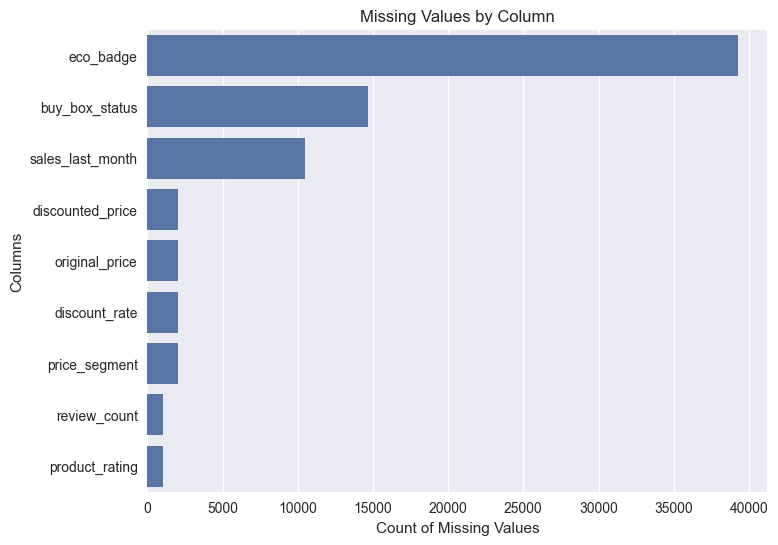

eco_badge           39267
buy_box_status      14653
sales_last_month    10511
discounted_price     2062
original_price       2062
discount_rate        2062
price_segment        2062
review_count         1024
product_rating       1024
dtype: int64

In [8]:
missing = df1.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]

sns.barplot(x=missing.values, y=missing.index, hue=None, dodge=False)
plt.title("Missing Values by Column")
plt.xlabel("Count of Missing Values")
plt.ylabel("Columns")
plt.show()

missing

### Missing Value Imputation Summary

To ensure data completeness and prevent statistical distortion, missing values were imputed as follows:

* **Mode Imputation:** Applied to categorical features such as `buy_box_status` and `price_segment`, where the most frequent category best represents typical cases.

* **Median Imputation:** Used for numerical features like `sales_last_month`, `discounted_price`, `original_price`, `discount_rate`, `review_count`, and `product_rating`, since median is robust to outliers and preserves data distribution.

* **Constant Value:** Features such as `eco_badge` were filled with `"No Badge"` to indicate missing sustainability labels explicitly.




In [9]:
df1['eco_badge'] = df1['eco_badge'].fillna('No Badge')

In [10]:
df1['buy_box_status'] = df1['buy_box_status'].fillna(df1['buy_box_status'].mode()[0])

In [11]:
df1['sales_last_month'] = df1['sales_last_month'].fillna(df1['sales_last_month'].median())

In [12]:
df1['price_segment'] = df1['price_segment'].fillna(df1['price_segment'].mode()[0])


In [13]:
df1['discounted_price'] = df1['discounted_price'].fillna(df1['discounted_price'].median())


In [14]:
df1['original_price'] = df1['original_price'].fillna(df1['original_price'].median())


In [15]:
df1['discount_rate'] = df1['discount_rate'].fillna(df1['discount_rate'].median())


In [16]:
df1['review_count'] = df1['review_count'].fillna(df1['review_count'].median())


In [17]:
df1['product_rating'] = df1['product_rating'].fillna(df1['product_rating'].median())


In [18]:
df1.isnull().sum()

product_title       0
product_rating      0
review_count        0
sales_last_month    0
discounted_price    0
original_price      0
best_seller         0
sponsored           0
coupon_available    0
buy_box_status      0
eco_badge           0
discount_rate       0
price_segment       0
has_discount        0
collection_day      0
collection_week     0
collection_month    0
product_category    0
dtype: int64

## Univriate Analysis

### Numerical Features

- Boxplots were used to visualize the distribution and detect outliers in numerical columns.
- `sales_last_month`, `review_count`, `discounted_price`, and `original_price` contain numerous outliers, indicating that some products have extremely high sales or price values.
- `discount_rate` is mostly concentrated at lower percentages, suggesting that high discounts are rare.
- `product_rating` is mainly clustered between 4 and 5, reflecting generally high customer satisfaction.

**Overall, the dataset exhibits a strong presence of outliers**

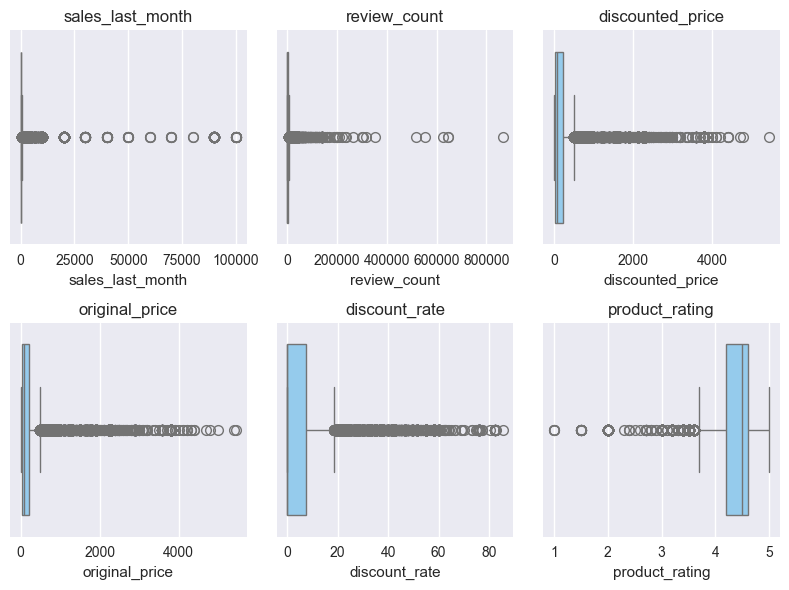

In [19]:
numeric_cols = ['sales_last_month', 'review_count', 'discounted_price', 'original_price', 'discount_rate', 'product_rating']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df1[col], color="#87CEFA")
    plt.title(col)
plt.tight_layout()
plt.show()

#### Product Ratings Distribution
- Most products are rated between 4 and 5 stars, indicating overall customer satisfaction and positive feedback.

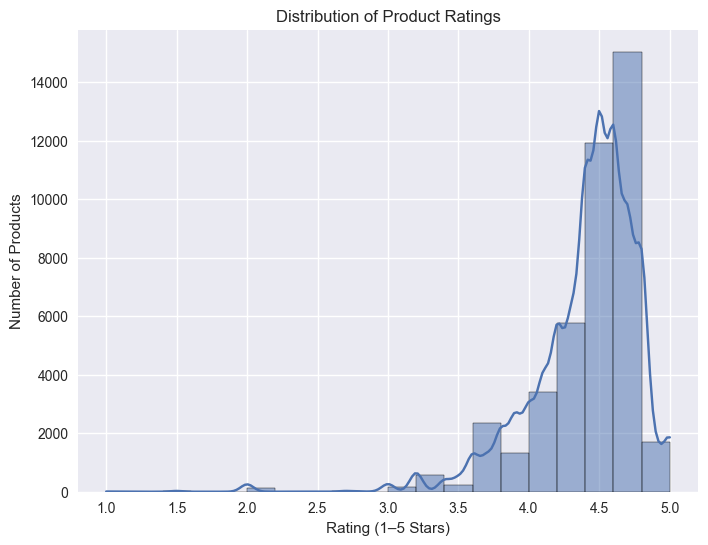

In [20]:
sns.histplot(df1['product_rating'], bins=20, kde=True)
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating (1–5 Stars)")
plt.ylabel("Number of Products")
plt.show()


#### Discount Rate Distribution
- The majority of products have low or no discounts, while high discount rates are rare and form a long-tail distribution.


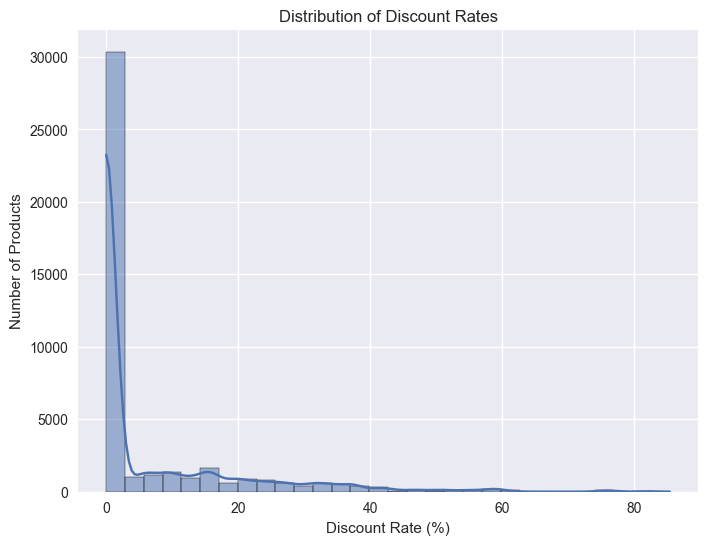

In [21]:
sns.histplot(df1['discount_rate'], bins=30, kde=True)
plt.title("Distribution of Discount Rates")
plt.xlabel("Discount Rate (%)")
plt.ylabel("Number of Products")
plt.show()


#### Price Segment Distribution
- Products are fairly balanced across Low, Medium, and High price segments, with a slight dominance of the Medium range.

### Kategorik

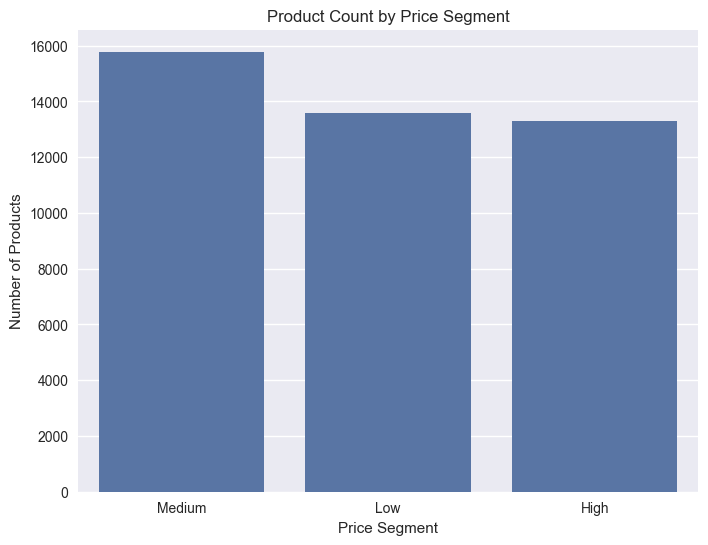

In [22]:
sns.countplot(data=df1, x='price_segment')
plt.title("Product Count by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Number of Products")
plt.show()


#### Eco Badge Distribution
- A significant majority of items lack eco-friendly badges, showing that sustainability labeling is still limited among products.

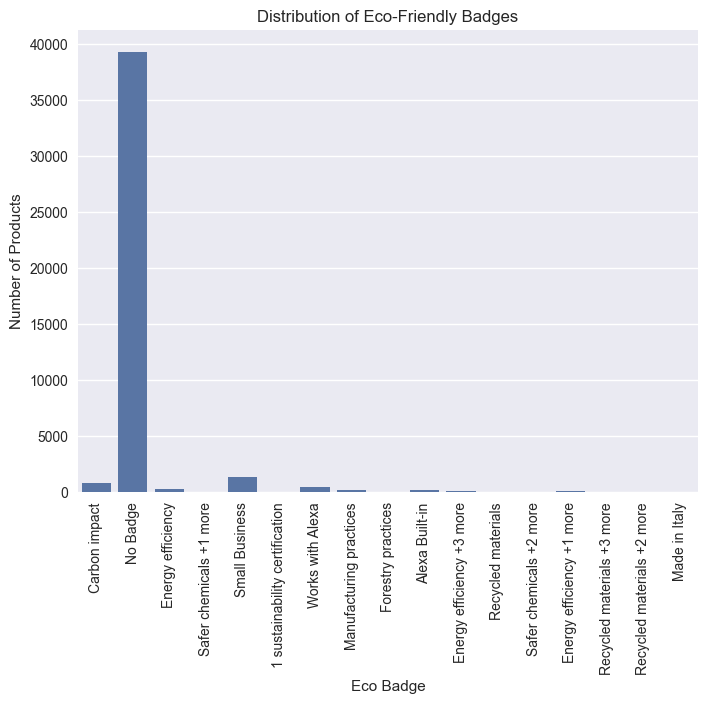

In [23]:
sns.countplot(data=df1, x='eco_badge')
plt.title("Distribution of Eco-Friendly Badges")
plt.xlabel("Eco Badge")
plt.ylabel("Number of Products")
plt.xticks(rotation=90)
plt.show()


#### Product Category Distribution
- The dataset is diverse, with the highest number of items in Tablets & iPads, followed by Laptops & Computers and Smartphones, while categories like Home & Appliances and Smart Home & Security have fewer listings.

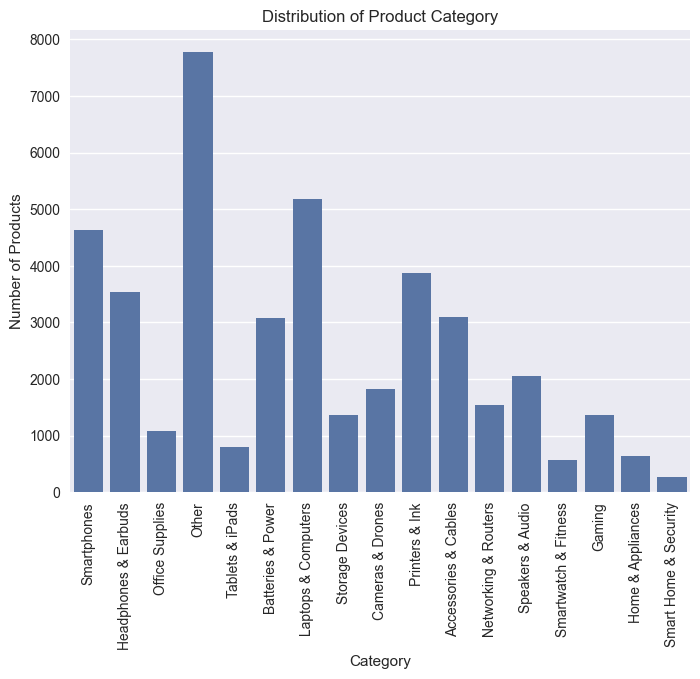

In [24]:
sns.countplot(data=df1, x='product_category')
plt.title("Distribution of Product Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.xticks(rotation=90)
plt.show()

#### Sponsored Label Distribution
- Most products are organic listings, while a smaller portion are sponsored, indicating that paid promotion is less common on the platform.

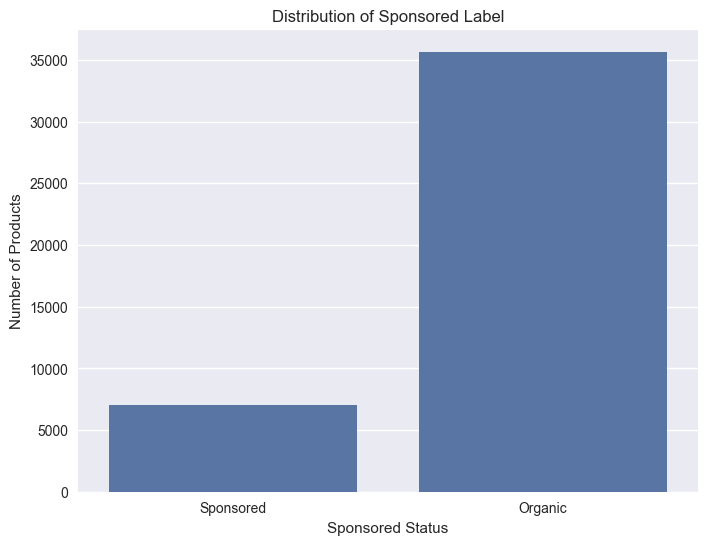

In [25]:
sns.countplot(data=df1, x='sponsored')
plt.title("Distribution of Sponsored Label")
plt.xlabel("Sponsored Status")
plt.ylabel("Number of Products")
plt.show()

## Ikili 

### Numerical
#### How does user rating change as price increases? (price vs rating)


- The chart shows that higher prices don’t always mean higher ratings. Most top-rated products are in the low to mid price range, suggesting that customers care more about value than price.

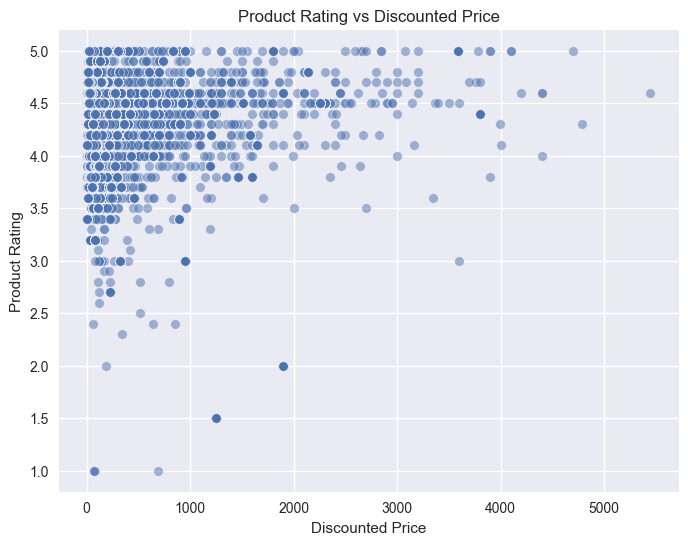

In [26]:
sns.scatterplot(data=df1, x='discounted_price', y='product_rating', alpha=0.5)
plt.title("Product Rating vs Discounted Price")
plt.xlabel("Discounted Price")
plt.ylabel("Product Rating")
plt.show()


#### Does discounts increase sales?
- The plot shows no clear relationship between higher discounts and increased sales. While discounts may help some products sell more, many discounted products still have low sales, suggesting that discounts alone don’t drive demand — other factors like product quality or visibility may play a stronger role.

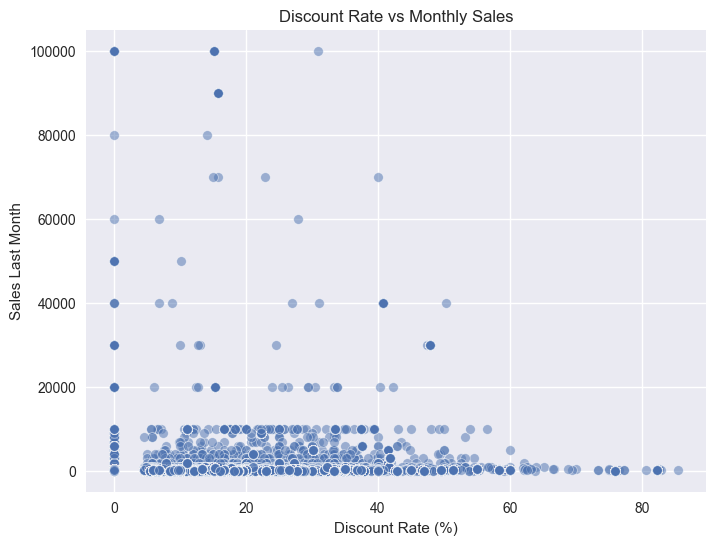

In [27]:
# Indirim satislari arttiroyru muu?
sns.scatterplot(data=df1, x='discount_rate', y='sales_last_month', alpha=0.5)
plt.title("Discount Rate vs Monthly Sales")
plt.xlabel("Discount Rate (%)")
plt.ylabel("Sales Last Month")
plt.show()

#### Do products with more reviews have higher ratings?
- There seems to be a slight positive trend — products with more reviews tend to have higher ratings, suggesting that popular products often perform well in customer satisfaction. However, ratings remain consistently high overall, even for items with fewer reviews.

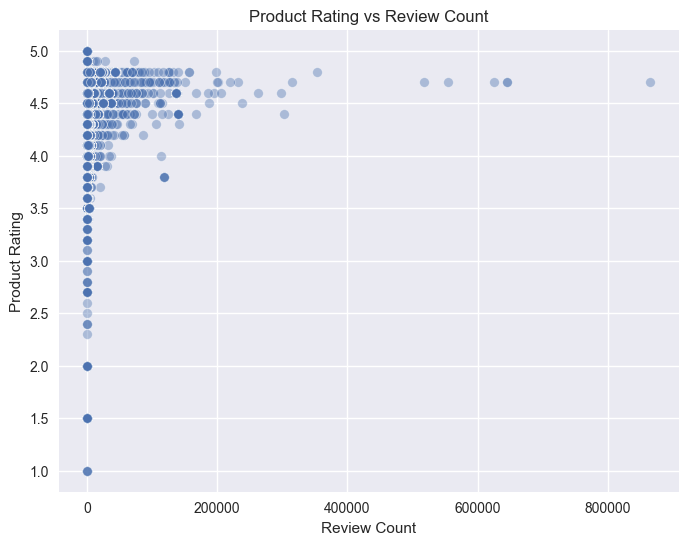

In [28]:
sns.scatterplot(data=df1, x='review_count', y='product_rating', alpha=0.4)
plt.title("Product Rating vs Review Count")
plt.xlabel("Review Count")
plt.ylabel("Product Rating")
plt.show()

### Product Rating vs Discounted Price

- There is **no clear correlation** between product price and rating — both low- and high-priced products receive **similar ratings**, mostly around 4–5 stars. This suggests that **price doesn’t strongly influence customer satisfaction**.


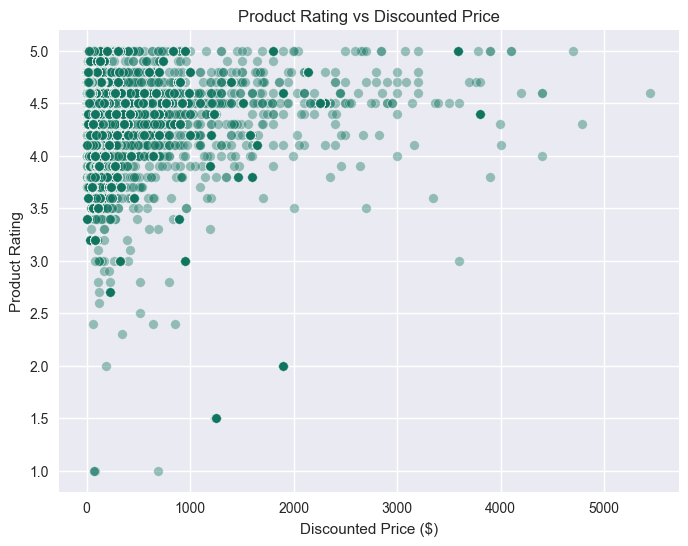

In [29]:
sns.scatterplot(data=df1,x='discounted_price',y='product_rating',alpha=0.4,color="#107460")
plt.title("Product Rating vs Discounted Price")
plt.xlabel("Discounted Price ($)")
plt.ylabel("Product Rating")
plt.show()

By Price Segment:  
- Low-priced products show the highest discount rates and monthly sales, while high-priced ones sell less despite smaller discounts.

In [30]:
price_summary = (df1.groupby('price_segment')[['discount_rate', 'sales_last_month']].mean().round(2).sort_values('sales_last_month', ascending=False))
price_summary


,discount_rate,sales_last_month
price_segment,,
Low,10.86,2610.95
Medium,4.73,371.71
High,3.28,175.91


By Best Seller Label:  
- “Best Seller” items have significantly higher sales (≈9x more) and slightly better ratings, showing strong customer trust.

In [31]:
bestseller_summary = (df1.groupby('best_seller')[['sales_last_month', 'product_rating']].mean().round(2).sort_values('sales_last_month', ascending=False))
bestseller_summary


,sales_last_month,product_rating
best_seller,,
Best Seller,9031.64,4.53
No Badge,972.36,4.40


By Product Category:  
- Categories like Cameras & Drones and Smartwatches have the highest average prices, while Accessories & Cables show the largest discounts, likely to drive volume sales.

In [32]:
category_summary = (df1.groupby('product_category')[['discounted_price', 'discount_rate']].mean().round(2).sort_values('discounted_price', ascending=False).head(10))
category_summary


,discounted_price,discount_rate
product_category,,
Cameras & Drones,551.98,2.09
Smartwatch & Fitness,405.09,3.32
Laptops & Computers,385.79,7.63
Smartphones,290.65,9.43
Printers & Ink,245.06,5.31
Gaming,236.72,2.11
Headphones & Earbuds,235.76,5.29
Accessories & Cables,198.99,11.88
Other,197.00,1.16


### Categorical

#### Median Sales by Price Segment
- Low-priced products have the highest median sales, followed by medium-priced ones, while high-priced products sell the least.

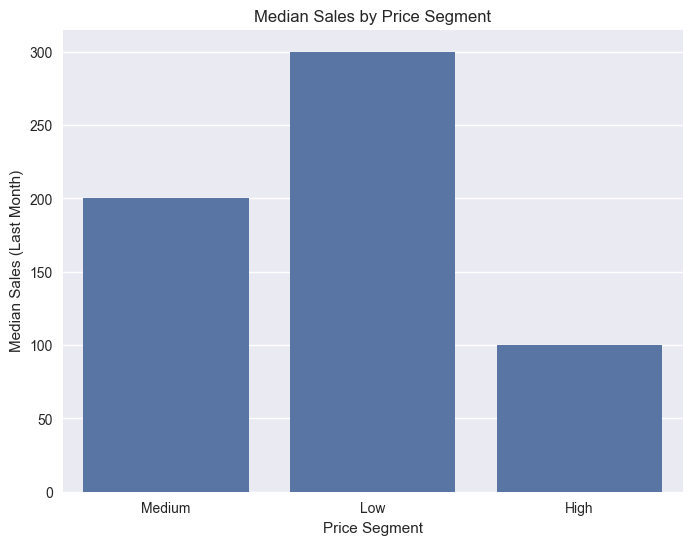

In [33]:
sns.barplot(data=df1, x='price_segment', y='sales_last_month', estimator='median',)
plt.title("Median Sales by Price Segment")
plt.xlabel("Price Segment")
plt.ylabel("Median Sales (Last Month)")
plt.show()


#### Median Sales by Best Seller Label
- Products marked as “Best Seller” have much higher median sales compared to others without the badge.

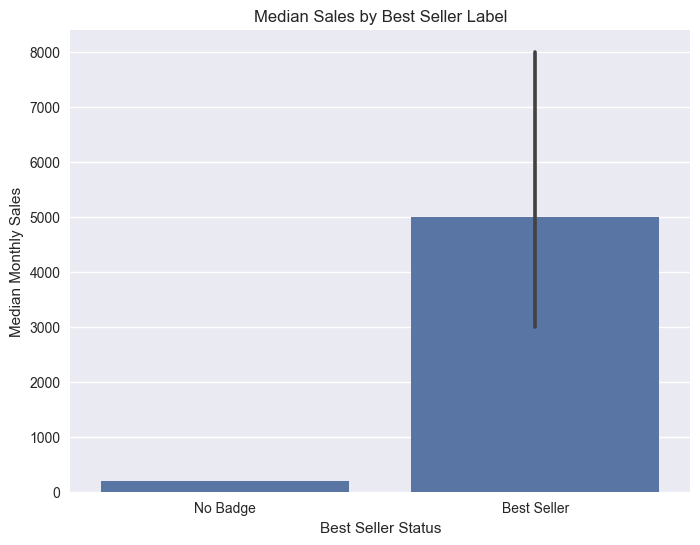

In [34]:
sns.barplot(data=df1,x='best_seller',y='sales_last_month',estimator='median')
plt.title("Median Sales by Best Seller Label")
plt.xlabel("Best Seller Status")
plt.ylabel("Median Monthly Sales")
plt.show()


#### Correlation Heatmap Insights
- Discounted Price and Original Price show a very strong positive correlation (0.97) — expected since discounts are derived from original prices.
- Discount Rate and Has Discount are strongly related (0.78), confirming consistency in discount labeling.
- Sales show moderate correlation (0.30) with Review Count, suggesting that more popular items tend to gather more reviews.

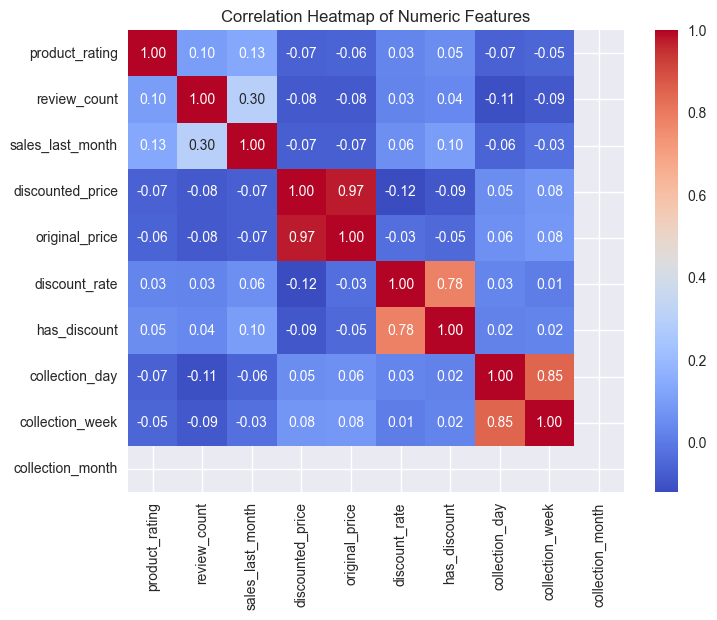

In [35]:
corr = df1.select_dtypes(include=['int64', 'float64']).corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

## General Summary
- The dataset was cleaned and analyzed to understand product performance on an e-commerce platform.  
- After handling missing values with appropriate methods (median/mode), the data showed consistent and logical patterns.  
- Most products have high ratings (4–5 stars), and discounts are generally low. “Best Seller” and lower-priced items achieve significantly higher sales.  
- Correlation analysis confirms strong relationships between price and discount variables, while review counts show a moderate link with sales.   

Overall, the dataset is clean, consistent, and ready for modeling or deeper analysis.

In [36]:
#df1.to_csv("../data/amazon_sales_2025_anaylzed.csv", index=False, encoding="utf-8")